In [36]:
import time
import numpy as np
import pandas as pd
import cmocean as cm
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [48]:
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

In [1]:
def comp2Direction(x, y):
    
    phi = np.arctan2(y, x)
    
    phiOcean = 0.5*np.pi - phi
    
    phiOcean = np.rad2deg(phiOcean)
    
    phiOcean[phiOcean<0] += 360
   
    return phiOcean

In [2]:
cd /home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos

/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos


In [4]:
dfu = pd.read_csv("boia-zonal-limpo.csv", delimiter= ';')
dfv = pd.read_csv("boia-meridional-limpo.csv", delimiter= ';')


In [5]:
tempo = dfu.loc[:,'time']

In [6]:
dfu.drop(['time'], axis=1, inplace=True)
dfv.drop(['time'], axis=1, inplace=True)

In [32]:
u, v = np.array(dfu), np.array(dfv)

In [33]:
phi = comp2Direction(u, v);
r = np.sqrt(u**2 + v**2)
del u, v;

/tmp/ipykernel_8335/2925034552.py:9: RuntimeWarning: invalid value encountered in less
  phiOcean[phiOcean<0] += 360


In [30]:
depths = np.arange(start=5.5, stop=55, step=2.5)

In [31]:
list(enumerate(depths))

[(0, 5.5),
 (1, 8.0),
 (2, 10.5),
 (3, 13.0),
 (4, 15.5),
 (5, 18.0),
 (6, 20.5),
 (7, 23.0),
 (8, 25.5),
 (9, 28.0),
 (10, 30.5),
 (11, 33.0),
 (12, 35.5),
 (13, 38.0),
 (14, 40.5),
 (15, 43.0),
 (16, 45.5),
 (17, 48.0),
 (18, 50.5),
 (19, 53.0)]

### indice das colunas 8, 16 e 32m

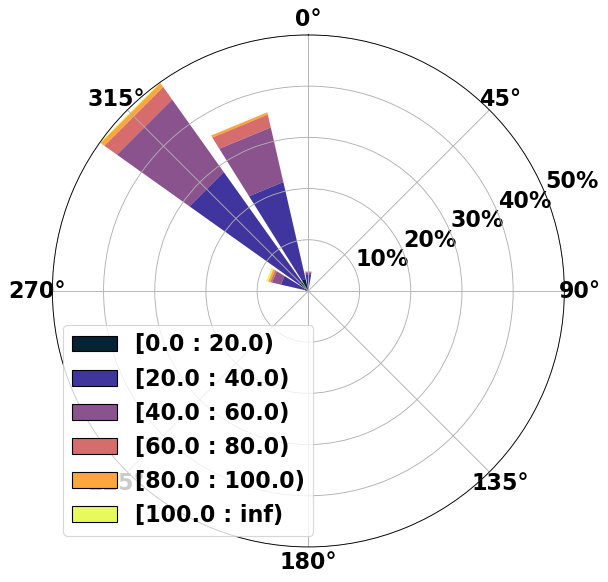

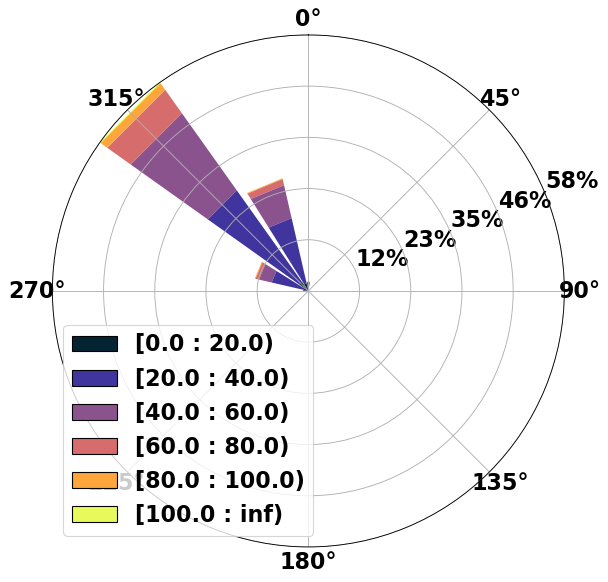

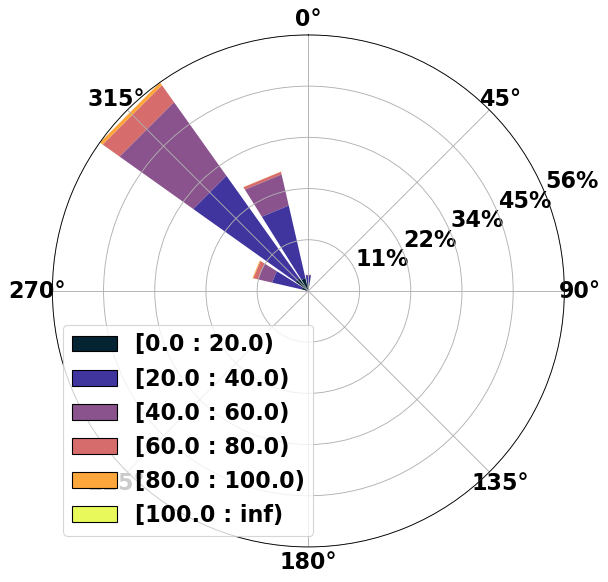

In [60]:
for coluna in (0, 4, 10):
    
    ax = WindroseAxes.from_ax()

    ax.set_theta_zero_location("N")

    ax.set_theta_direction(-1)

    ax.bar(phi[:,coluna], r[:,coluna],
       normed=True,
       opening=.85,
       nsector=16,
       bins=range(0, 120, 20),
       blowto=True, cmap = cm.cm.thermal)

    y = list(ax.get_yticks())
    ystr = ["{:.0f}".format(round(ii))+'%' for ii in y]
    ax.set_yticklabels(ystr)
    plt.legend(loc='lower left',fontsize=20)
    #plt.savefig('/home/gus/Documentos/mestrado/dados-mestrado'+
    #           '/figuras/correntes/camada'+str(coluna)+'.jpg', dpi=300)
